In [1]:
import pandas as pd
import numpy as np
import sqlite3
from datetime import date
def pd_to_sqlDB(input_df: pd.DataFrame,
                table_name: str,
                db_name: str = 'default.db') -> None:

    '''Take a Pandas dataframe `input_df` and upload it to `table_name` SQLITE table

    Args:
        input_df (pd.DataFrame): Dataframe containing data to upload to SQLITE
        table_name (str): Name of the SQLITE table to upload to
        db_name (str, optional): Name of the SQLITE Database in which the table is created. 
                                 Defaults to 'default.db'.
    '''

    # Step 1: Setup local logging
    import logging
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s: %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')

    # Step 2: Find columns in the dataframe
    cols = input_df.columns
    cols_string = ','.join(cols)
    val_wildcard_string = ','.join(['?'] * len(cols))

    # Step 3: Connect to a DB file if it exists, else crete a new file
    con = sqlite3.connect(db_name)
    cur = con.cursor()
    logging.info(f'SQL DB {db_name} created')

    # Step 4: Create Table
    sql_string = f"""CREATE TABLE {table_name} ({cols_string});"""
    cur.execute(sql_string)
    logging.info(f'SQL Table {table_name} created with {len(cols)} columns')

    # Step 5: Upload the dataframe
    rows_to_upload = input_df.to_dict(orient='split')['data']
    sql_string = f"""INSERT INTO {table_name} ({cols_string}) VALUES ({val_wildcard_string});"""    
    cur.executemany(sql_string, rows_to_upload)
    logging.info(f'{len(rows_to_upload)} rows uploaded to {table_name}')
  
    # Step 6: Commit the changes and close the connection
    con.commit()
    con.close()
def sql_query_to_pd(sql_query_string: str, db_name: str ='default.db') -> pd.DataFrame:
    '''Execute an SQL query and return the results as a pandas dataframe

    Args:
        sql_query_string (str): SQL query string to execute
        db_name (str, optional): Name of the SQLITE Database to execute the query in.
                                 Defaults to 'default.db'.

    Returns:
        pd.DataFrame: Results of the SQL query in a pandas dataframe
    '''    
    # Step 1: Connect to the SQL DB
    con = sqlite3.connect(db_name)

    # Step 2: Execute the SQL query
    cursor = con.execute(sql_query_string)

    # Step 3: Fetch the data and column names
    result_data = cursor.fetchall()
    cols = [description[0] for description in cursor.description]

    # Step 4: Close the connection
    con.close()

    # Step 5: Return as a dataframe
    return pd.DataFrame(result_data, columns=cols)

## SQL HR DATABASE


---

Creating a HR Database
```sql
CREATE TABLE regions (
	region_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
	region_name text NOT NULL
);

CREATE TABLE countries (
	country_id text NOT NULL,
	country_name text NOT NULL,
	region_id INTEGER NOT NULL,
	PRIMARY KEY (country_id ASC),
	FOREIGN KEY (region_id) REFERENCES regions (region_id) ON DELETE CASCADE ON UPDATE CASCADE
);

CREATE TABLE locations (
	location_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
	street_address text,
	postal_code text,
	city text NOT NULL,
	state_province text,
	country_id INTEGER NOT NULL,
	FOREIGN KEY (country_id) REFERENCES countries (country_id) ON DELETE CASCADE ON UPDATE CASCADE
);

CREATE TABLE departments (
	department_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
	department_name text NOT NULL,
	location_id INTEGER NOT NULL,
	FOREIGN KEY (location_id) REFERENCES locations (location_id) ON DELETE CASCADE ON UPDATE CASCADE
);

CREATE TABLE jobs (
	job_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
	job_title text NOT NULL,
	min_salary double NOT NULL,
	max_salary double NOT NULL
);

CREATE TABLE employees (
	employee_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
	first_name text,
	last_name text NOT NULL,
	email text NOT NULL,
	phone_number text,
	hire_date text NOT NULL,
	job_id INTEGER NOT NULL,
	salary double NOT NULL,
	manager_id INTEGER,
	department_id INTEGER NOT NULL,
	FOREIGN KEY (job_id) REFERENCES jobs (job_id) ON DELETE CASCADE ON UPDATE CASCADE,
	FOREIGN KEY (department_id) REFERENCES departments (department_id) ON DELETE CASCADE ON UPDATE CASCADE,
	FOREIGN KEY (manager_id) REFERENCES employees (employee_id) ON DELETE CASCADE ON UPDATE CASCADE
);

CREATE TABLE dependents (
	dependent_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
	first_name text NOT NULL,
	last_name text NOT NULL,
	relationship text NOT NULL,
	employee_id INTEGER NOT NULL,
	FOREIGN KEY (employee_id) REFERENCES employees (employee_id) ON DELETE CASCADE ON UPDATE CASCADE
);
```

Inserting data into tables

```sql
/*Data for the table regions */

INSERT INTO regions(region_id,region_name) VALUES (1,'Europe');
INSERT INTO regions(region_id,region_name) VALUES (2,'Americas');
INSERT INTO regions(region_id,region_name) VALUES (3,'Asia');
INSERT INTO regions(region_id,region_name) VALUES (4,'Middle East and Africa');


/*Data for the table countries */
INSERT INTO countries(country_id,country_name,region_id) VALUES ('AR','Argentina',2);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('AU','Australia',3);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('BE','Belgium',1);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('BR','Brazil',2);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('CA','Canada',2);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('CH','Switzerland',1);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('CN','China',3);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('DE','Germany',1);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('DK','Denmark',1);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('EG','Egypt',4);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('FR','France',1);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('HK','HongKong',3);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('IL','Israel',4);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('IN','India',3);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('IT','Italy',1);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('JP','Japan',3);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('KW','Kuwait',4);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('MX','Mexico',2);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('NG','Nigeria',4);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('NL','Netherlands',1);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('SG','Singapore',3);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('UK','United Kingdom',1);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('US','United States of America',2);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('ZM','Zambia',4);
INSERT INTO countries(country_id,country_name,region_id) VALUES ('ZW','Zimbabwe',4);

/*Data for the table locations */
INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (1400,'2014 Jabberwocky Rd','26192','Southlake','Texas','US');
INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (1500,'2011 Interiors Blvd','99236','South San Francisco','California','US');
INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (1700,'2004 Charade Rd','98199','Seattle','Washington','US');
INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (1800,'147 Spadina Ave','M5V 2L7','Toronto','Ontario','CA');
INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (2400,'8204 Arthur St',NULL,'London',NULL,'UK');
INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (2500,'Magdalen Centre, The Oxford Science Park','OX9 9ZB','Oxford','Oxford','UK');
INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (2700,'Schwanthalerstr. 7031','80925','Munich','Bavaria','DE');


/*Data for the table jobs */

INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (1,'Public Accountant',4200.00,9000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (2,'Accounting Manager',8200.00,16000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (3,'Administration Assistant',3000.00,6000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (4,'President',20000.00,40000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (5,'Administration Vice President',15000.00,30000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (6,'Accountant',4200.00,9000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (7,'Finance Manager',8200.00,16000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (8,'Human Resources Representative',4000.00,9000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (9,'Programmer',4000.00,10000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (10,'Marketing Manager',9000.00,15000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (11,'Marketing Representative',4000.00,9000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (12,'Public Relations Representative',4500.00,10500.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (13,'Purchasing Clerk',2500.00,5500.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (14,'Purchasing Manager',8000.00,15000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (15,'Sales Manager',10000.00,20000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (16,'Sales Representative',6000.00,12000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (17,'Shipping Clerk',2500.00,5500.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (18,'Stock Clerk',2000.00,5000.00);
INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (19,'Stock Manager',5500.00,8500.00);


/*Data for the table departments */

INSERT INTO departments(department_id,department_name,location_id) VALUES (1,'Administration',1700);
INSERT INTO departments(department_id,department_name,location_id) VALUES (2,'Marketing',1800);
INSERT INTO departments(department_id,department_name,location_id) VALUES (3,'Purchasing',1700);
INSERT INTO departments(department_id,department_name,location_id) VALUES (4,'Human Resources',2400);
INSERT INTO departments(department_id,department_name,location_id) VALUES (5,'Shipping',1500);
INSERT INTO departments(department_id,department_name,location_id) VALUES (6,'IT',1400);
INSERT INTO departments(department_id,department_name,location_id) VALUES (7,'Public Relations',2700);
INSERT INTO departments(department_id,department_name,location_id) VALUES (8,'Sales',2500);
INSERT INTO departments(department_id,department_name,location_id) VALUES (9,'Executive',1700);
INSERT INTO departments(department_id,department_name,location_id) VALUES (10,'Finance',1700);
INSERT INTO departments(department_id,department_name,location_id) VALUES (11,'Accounting',1700);



/*Data for the table employees */

INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (100,'Steven','King','steven.king@sqltutorial.org','515.123.4567','1987-06-17',4,24000.00,NULL,9);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (101,'Neena','Kochhar','neena.kochhar@sqltutorial.org','515.123.4568','1989-09-21',5,17000.00,100,9);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (102,'Lex','De Haan','lex.de haan@sqltutorial.org','515.123.4569','1993-01-13',5,17000.00,100,9);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (103,'Alexander','Hunold','alexander.hunold@sqltutorial.org','590.423.4567','1990-01-03',9,9000.00,102,6);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (104,'Bruce','Ernst','bruce.ernst@sqltutorial.org','590.423.4568','1991-05-21',9,6000.00,103,6);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (105,'David','Austin','david.austin@sqltutorial.org','590.423.4569','1997-06-25',9,4800.00,103,6);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (106,'Valli','Pataballa','valli.pataballa@sqltutorial.org','590.423.4560','1998-02-05',9,4800.00,103,6);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (107,'Diana','Lorentz','diana.lorentz@sqltutorial.org','590.423.5567','1999-02-07',9,4200.00,103,6);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (108,'Nancy','Greenberg','nancy.greenberg@sqltutorial.org','515.124.4569','1994-08-17',7,12000.00,101,10);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (109,'Daniel','Faviet','daniel.faviet@sqltutorial.org','515.124.4169','1994-08-16',6,9000.00,108,10);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (110,'John','Chen','john.chen@sqltutorial.org','515.124.4269','1997-09-28',6,8200.00,108,10);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (111,'Ismael','Sciarra','ismael.sciarra@sqltutorial.org','515.124.4369','1997-09-30',6,7700.00,108,10);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (112,'Jose Manuel','Urman','jose manuel.urman@sqltutorial.org','515.124.4469','1998-03-07',6,7800.00,108,10);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (113,'Luis','Popp','luis.popp@sqltutorial.org','515.124.4567','1999-12-07',6,6900.00,108,10);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (114,'Den','Raphaely','den.raphaely@sqltutorial.org','515.127.4561','1994-12-07',14,11000.00,100,3);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (115,'Alexander','Khoo','alexander.khoo@sqltutorial.org','515.127.4562','1995-05-18',13,3100.00,114,3);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (116,'Shelli','Baida','shelli.baida@sqltutorial.org','515.127.4563','1997-12-24',13,2900.00,114,3);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (117,'Sigal','Tobias','sigal.tobias@sqltutorial.org','515.127.4564','1997-07-24',13,2800.00,114,3);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (118,'Guy','Himuro','guy.himuro@sqltutorial.org','515.127.4565','1998-11-15',13,2600.00,114,3);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (119,'Karen','Colmenares','karen.colmenares@sqltutorial.org','515.127.4566','1999-08-10',13,2500.00,114,3);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (120,'Matthew','Weiss','matthew.weiss@sqltutorial.org','650.123.1234','1996-07-18',19,8000.00,100,5);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (121,'Adam','Fripp','adam.fripp@sqltutorial.org','650.123.2234','1997-04-10',19,8200.00,100,5);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (122,'Payam','Kaufling','payam.kaufling@sqltutorial.org','650.123.3234','1995-05-01',19,7900.00,100,5);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (123,'Shanta','Vollman','shanta.vollman@sqltutorial.org','650.123.4234','1997-10-10',19,6500.00,100,5);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (126,'Irene','Mikkilineni','irene.mikkilineni@sqltutorial.org','650.124.1224','1998-09-28',18,2700.00,120,5);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (145,'John','Russell','john.russell@sqltutorial.org',NULL,'1996-10-01',15,14000.00,100,8);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (146,'Karen','Partners','karen.partners@sqltutorial.org',NULL,'1997-01-05',15,13500.00,100,8);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (176,'Jonathon','Taylor','jonathon.taylor@sqltutorial.org',NULL,'1998-03-24',16,8600.00,100,8);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (177,'Jack','Livingston','jack.livingston@sqltutorial.org',NULL,'1998-04-23',16,8400.00,100,8);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (178,'Kimberely','Grant','kimberely.grant@sqltutorial.org',NULL,'1999-05-24',16,7000.00,100,8);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (179,'Charles','Johnson','charles.johnson@sqltutorial.org',NULL,'2000-01-04',16,6200.00,100,8);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (192,'Sarah','Bell','sarah.bell@sqltutorial.org','650.501.1876','1996-02-04',17,4000.00,123,5);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (193,'Britney','Everett','britney.everett@sqltutorial.org','650.501.2876','1997-03-03',17,3900.00,123,5);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (200,'Jennifer','Whalen','jennifer.whalen@sqltutorial.org','515.123.4444','1987-09-17',3,4400.00,101,1);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (201,'Michael','Hartstein','michael.hartstein@sqltutorial.org','515.123.5555','1996-02-17',10,13000.00,100,2);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (202,'Pat','Fay','pat.fay@sqltutorial.org','603.123.6666','1997-08-17',11,6000.00,201,2);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (203,'Susan','Mavris','susan.mavris@sqltutorial.org','515.123.7777','1994-06-07',8,6500.00,101,4);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (204,'Hermann','Baer','hermann.baer@sqltutorial.org','515.123.8888','1994-06-07',12,10000.00,101,7);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (205,'Shelley','Higgins','shelley.higgins@sqltutorial.org','515.123.8080','1994-06-07',2,12000.00,101,11);
INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (206,'William','Gietz','william.gietz@sqltutorial.org','515.123.8181','1994-06-07',1,8300.00,205,11);


/*Data for the table dependents */

INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (1,'Penelope','Gietz','Child',206);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (2,'Nick','Higgins','Child',205);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (3,'Ed','Whalen','Child',200);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (4,'Jennifer','King','Child',100);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (5,'Johnny','Kochhar','Child',101);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (6,'Bette','De Haan','Child',102);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (7,'Grace','Faviet','Child',109);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (8,'Matthew','Chen','Child',110);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (9,'Joe','Sciarra','Child',111);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (10,'Christian','Urman','Child',112);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (11,'Zero','Popp','Child',113);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (12,'Karl','Greenberg','Child',108);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (13,'Uma','Mavris','Child',203);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (14,'Vivien','Hunold','Child',103);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (15,'Cuba','Ernst','Child',104);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (16,'Fred','Austin','Child',105);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (17,'Helen','Pataballa','Child',106);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (18,'Dan','Lorentz','Child',107);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (19,'Bob','Hartstein','Child',201);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (20,'Lucille','Fay','Child',202);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (21,'Kirsten','Baer','Child',204);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (22,'Elvis','Khoo','Child',115);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (23,'Sandra','Baida','Child',116);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (24,'Cameron','Tobias','Child',117);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (25,'Kevin','Himuro','Child',118);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (26,'Rip','Colmenares','Child',119);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (27,'Julia','Raphaely','Child',114);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (28,'Woody','Russell','Child',145);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (29,'Alec','Partners','Child',146);
INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (30,'Sandra','Taylor','Child',176);
```

In [ ]:
db = sqlite3.connect("humanResource.db")
# try:
#   db.execute("create table results(Name text, Date datetime, Mobile text,Mail text)")
# except:
#   print("Already table existed !!")

In [ ]:
table_region = """
CREATE TABLE regions (
    region_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    region_name text NOT NULL
);
"""
db.execute("drop table if exists regions")
db.execute(table_region)
# db.commit()

In [ ]:
table_region = """
CREATE TABLE regions (
    region_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    region_name text NOT NULL
);
"""
db.execute("drop table if exists regions")
db.execute(table_region)
db.commit()

table_countries =  """
CREATE TABLE countries (
    country_id text NOT NULL,
    country_name text NOT NULL,
    region_id INTEGER NOT NULL,
    PRIMARY KEY (country_id ASC),
    FOREIGN KEY (region_id) REFERENCES regions (region_id) ON DELETE CASCADE ON UPDATE CASCADE
);
"""
db.execute("drop table if exists countries")
db.execute(table_countries)
db.commit()

table_locations =  """
CREATE TABLE locations (
    location_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    street_address text,
    postal_code text,
    city text NOT NULL,
    state_province text,
    country_id INTEGER NOT NULL,
    FOREIGN KEY (country_id) REFERENCES countries (country_id) ON DELETE CASCADE ON UPDATE CASCADE
);
"""
db.execute("drop table if exists locations")
db.execute(table_locations)
db.commit()

table_departments =  """
CREATE TABLE departments (
    department_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    department_name text NOT NULL,
    location_id INTEGER NOT NULL,
    FOREIGN KEY (location_id) REFERENCES locations (location_id) ON DELETE CASCADE ON UPDATE CASCADE
);
"""

db.execute("drop table if exists departments")
db.execute(table_departments)
db.commit()

table_jobs =  """
CREATE TABLE jobs (
    job_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    job_title text NOT NULL,
    min_salary double NOT NULL,
    max_salary double NOT NULL
);
"""

db.execute("drop table if exists jobs")
db.execute(table_jobs)
db.commit()

table_employees = """
CREATE TABLE employees (
    employee_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    first_name text,
    last_name text NOT NULL,
    email text NOT NULL,
    phone_number text,
    hire_date text NOT NULL,
    job_id INTEGER NOT NULL,
    salary double NOT NULL,
    manager_id INTEGER,
    department_id INTEGER NOT NULL,
    FOREIGN KEY (job_id) REFERENCES jobs (job_id) ON DELETE CASCADE ON UPDATE CASCADE,
    FOREIGN KEY (department_id) REFERENCES departments (department_id) ON DELETE CASCADE ON UPDATE CASCADE,
    FOREIGN KEY (manager_id) REFERENCES employees (employee_id) ON DELETE CASCADE ON UPDATE CASCADE
);
"""

db.execute("drop table if exists employees")
db.execute(table_employees)
db.commit()

table_dependents = """
CREATE TABLE dependents (
    dependent_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    first_name text NOT NULL,
    last_name text NOT NULL,
    relationship text NOT NULL,
    employee_id INTEGER NOT NULL,
    FOREIGN KEY (employee_id) REFERENCES employees (employee_id) ON DELETE CASCADE ON UPDATE CASCADE
);
"""

db.execute("drop table if exists dependents")
db.execute(table_dependents)
db.commit()


In [ ]:
data =["INSERT INTO regions(region_id,region_name) VALUES (1,'Europe');",
"INSERT INTO regions(region_id,region_name) VALUES (2,'Americas');",
"INSERT INTO regions(region_id,region_name) VALUES (3,'Asia');",
"INSERT INTO regions(region_id,region_name) VALUES (4,'Middle East and Africa');",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('AR','Argentina',2);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('AU','Australia',3);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('BE','Belgium',1);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('BR','Brazil',2);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('CA','Canada',2);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('CH','Switzerland',1);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('CN','China',3);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('DE','Germany',1);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('DK','Denmark',1);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('EG','Egypt',4);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('FR','France',1);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('HK','HongKong',3);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('IL','Israel',4);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('IN','India',3);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('IT','Italy',1);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('JP','Japan',3);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('KW','Kuwait',4);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('MX','Mexico',2);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('NG','Nigeria',4);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('NL','Netherlands',1);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('SG','Singapore',3);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('UK','United Kingdom',1);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('US','United States of America',2);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('ZM','Zambia',4);",
"INSERT INTO countries(country_id,country_name,region_id) VALUES ('ZW','Zimbabwe',4);",
"INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (1400,'2014 Jabberwocky Rd','26192','Southlake','Texas','US');",
"INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (1500,'2011 Interiors Blvd','99236','South San Francisco','California','US');",
"INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (1700,'2004 Charade Rd','98199','Seattle','Washington','US');",
"INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (1800,'147 Spadina Ave','M5V 2L7','Toronto','Ontario','CA');",
"INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (2400,'8204 Arthur St',NULL,'London',NULL,'UK');",
"INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (2500,'Magdalen Centre, The Oxford Science Park','OX9 9ZB','Oxford','Oxford','UK');",
"INSERT INTO locations(location_id,street_address,postal_code,city,state_province,country_id) VALUES (2700,'Schwanthalerstr. 7031','80925','Munich','Bavaria','DE');",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (1,'Public Accountant',4200.00,9000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (2,'Accounting Manager',8200.00,16000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (3,'Administration Assistant',3000.00,6000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (4,'President',20000.00,40000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (5,'Administration Vice President',15000.00,30000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (6,'Accountant',4200.00,9000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (7,'Finance Manager',8200.00,16000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (8,'Human Resources Representative',4000.00,9000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (9,'Programmer',4000.00,10000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (10,'Marketing Manager',9000.00,15000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (11,'Marketing Representative',4000.00,9000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (12,'Public Relations Representative',4500.00,10500.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (13,'Purchasing Clerk',2500.00,5500.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (14,'Purchasing Manager',8000.00,15000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (15,'Sales Manager',10000.00,20000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (16,'Sales Representative',6000.00,12000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (17,'Shipping Clerk',2500.00,5500.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (18,'Stock Clerk',2000.00,5000.00);",
"INSERT INTO jobs(job_id,job_title,min_salary,max_salary) VALUES (19,'Stock Manager',5500.00,8500.00);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (1,'Administration',1700);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (2,'Marketing',1800);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (3,'Purchasing',1700);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (4,'Human Resources',2400);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (5,'Shipping',1500);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (6,'IT',1400);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (7,'Public Relations',2700);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (8,'Sales',2500);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (9,'Executive',1700);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (10,'Finance',1700);",
"INSERT INTO departments(department_id,department_name,location_id) VALUES (11,'Accounting',1700);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (100,'Steven','King','steven.king@sqltutorial.org','515.123.4567','1987-06-17',4,24000.00,NULL,9);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (101,'Neena','Kochhar','neena.kochhar@sqltutorial.org','515.123.4568','1989-09-21',5,17000.00,100,9);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (102,'Lex','De Haan','lex.de haan@sqltutorial.org','515.123.4569','1993-01-13',5,17000.00,100,9);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (103,'Alexander','Hunold','alexander.hunold@sqltutorial.org','590.423.4567','1990-01-03',9,9000.00,102,6);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (104,'Bruce','Ernst','bruce.ernst@sqltutorial.org','590.423.4568','1991-05-21',9,6000.00,103,6);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (105,'David','Austin','david.austin@sqltutorial.org','590.423.4569','1997-06-25',9,4800.00,103,6);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (106,'Valli','Pataballa','valli.pataballa@sqltutorial.org','590.423.4560','1998-02-05',9,4800.00,103,6);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (107,'Diana','Lorentz','diana.lorentz@sqltutorial.org','590.423.5567','1999-02-07',9,4200.00,103,6);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (108,'Nancy','Greenberg','nancy.greenberg@sqltutorial.org','515.124.4569','1994-08-17',7,12000.00,101,10);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (109,'Daniel','Faviet','daniel.faviet@sqltutorial.org','515.124.4169','1994-08-16',6,9000.00,108,10);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (110,'John','Chen','john.chen@sqltutorial.org','515.124.4269','1997-09-28',6,8200.00,108,10);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (111,'Ismael','Sciarra','ismael.sciarra@sqltutorial.org','515.124.4369','1997-09-30',6,7700.00,108,10);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (112,'Jose Manuel','Urman','jose manuel.urman@sqltutorial.org','515.124.4469','1998-03-07',6,7800.00,108,10);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (113,'Luis','Popp','luis.popp@sqltutorial.org','515.124.4567','1999-12-07',6,6900.00,108,10);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (114,'Den','Raphaely','den.raphaely@sqltutorial.org','515.127.4561','1994-12-07',14,11000.00,100,3);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (115,'Alexander','Khoo','alexander.khoo@sqltutorial.org','515.127.4562','1995-05-18',13,3100.00,114,3);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (116,'Shelli','Baida','shelli.baida@sqltutorial.org','515.127.4563','1997-12-24',13,2900.00,114,3);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (117,'Sigal','Tobias','sigal.tobias@sqltutorial.org','515.127.4564','1997-07-24',13,2800.00,114,3);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (118,'Guy','Himuro','guy.himuro@sqltutorial.org','515.127.4565','1998-11-15',13,2600.00,114,3);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (119,'Karen','Colmenares','karen.colmenares@sqltutorial.org','515.127.4566','1999-08-10',13,2500.00,114,3);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (120,'Matthew','Weiss','matthew.weiss@sqltutorial.org','650.123.1234','1996-07-18',19,8000.00,100,5);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (121,'Adam','Fripp','adam.fripp@sqltutorial.org','650.123.2234','1997-04-10',19,8200.00,100,5);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (122,'Payam','Kaufling','payam.kaufling@sqltutorial.org','650.123.3234','1995-05-01',19,7900.00,100,5);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (123,'Shanta','Vollman','shanta.vollman@sqltutorial.org','650.123.4234','1997-10-10',19,6500.00,100,5);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (126,'Irene','Mikkilineni','irene.mikkilineni@sqltutorial.org','650.124.1224','1998-09-28',18,2700.00,120,5);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (145,'John','Russell','john.russell@sqltutorial.org',NULL,'1996-10-01',15,14000.00,100,8);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (146,'Karen','Partners','karen.partners@sqltutorial.org',NULL,'1997-01-05',15,13500.00,100,8);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (176,'Jonathon','Taylor','jonathon.taylor@sqltutorial.org',NULL,'1998-03-24',16,8600.00,100,8);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (177,'Jack','Livingston','jack.livingston@sqltutorial.org',NULL,'1998-04-23',16,8400.00,100,8);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (178,'Kimberely','Grant','kimberely.grant@sqltutorial.org',NULL,'1999-05-24',16,7000.00,100,8);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (179,'Charles','Johnson','charles.johnson@sqltutorial.org',NULL,'2000-01-04',16,6200.00,100,8);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (192,'Sarah','Bell','sarah.bell@sqltutorial.org','650.501.1876','1996-02-04',17,4000.00,123,5);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (193,'Britney','Everett','britney.everett@sqltutorial.org','650.501.2876','1997-03-03',17,3900.00,123,5);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (200,'Jennifer','Whalen','jennifer.whalen@sqltutorial.org','515.123.4444','1987-09-17',3,4400.00,101,1);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (201,'Michael','Hartstein','michael.hartstein@sqltutorial.org','515.123.5555','1996-02-17',10,13000.00,100,2);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (202,'Pat','Fay','pat.fay@sqltutorial.org','603.123.6666','1997-08-17',11,6000.00,201,2);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (203,'Susan','Mavris','susan.mavris@sqltutorial.org','515.123.7777','1994-06-07',8,6500.00,101,4);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (204,'Hermann','Baer','hermann.baer@sqltutorial.org','515.123.8888','1994-06-07',12,10000.00,101,7);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (205,'Shelley','Higgins','shelley.higgins@sqltutorial.org','515.123.8080','1994-06-07',2,12000.00,101,11);",
"INSERT INTO employees(employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id) VALUES (206,'William','Gietz','william.gietz@sqltutorial.org','515.123.8181','1994-06-07',1,8300.00,205,11);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (1,'Penelope','Gietz','Child',206);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (2,'Nick','Higgins','Child',205);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (3,'Ed','Whalen','Child',200);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (4,'Jennifer','King','Child',100);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (5,'Johnny','Kochhar','Child',101);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (6,'Bette','De Haan','Child',102);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (7,'Grace','Faviet','Child',109);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (8,'Matthew','Chen','Child',110);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (9,'Joe','Sciarra','Child',111);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (10,'Christian','Urman','Child',112);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (11,'Zero','Popp','Child',113);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (12,'Karl','Greenberg','Child',108);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (13,'Uma','Mavris','Child',203);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (14,'Vivien','Hunold','Child',103);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (15,'Cuba','Ernst','Child',104);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (16,'Fred','Austin','Child',105);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (17,'Helen','Pataballa','Child',106);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (18,'Dan','Lorentz','Child',107);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (19,'Bob','Hartstein','Child',201);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (20,'Lucille','Fay','Child',202);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (21,'Kirsten','Baer','Child',204);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (22,'Elvis','Khoo','Child',115);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (23,'Sandra','Baida','Child',116);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (24,'Cameron','Tobias','Child',117);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (25,'Kevin','Himuro','Child',118);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (26,'Rip','Colmenares','Child',119);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (27,'Julia','Raphaely','Child',114);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (28,'Woody','Russell','Child',145);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (29,'Alec','Partners','Child',146);",
"INSERT INTO dependents(dependent_id,first_name,last_name,relationship,employee_id) VALUES (30,'Sandra','Taylor','Child',176);"
]
data[0]


"INSERT INTO regions(region_id,region_name) VALUES (1,'Europe');"

In [ ]:
for d in data:
  db.execute(d)

In [ ]:
regions = pd.read_sql_query("SELECT * FROM regions", db)
display(regions)
countries = pd.read_sql_query("SELECT * FROM countries", db)
display(countries.head())
locations = pd.read_sql_query("SELECT * FROM locations", db)
display(locations.head())
departments = pd.read_sql_query("SELECT * FROM departments", db)
display(departments.head())
jobs = pd.read_sql_query("SELECT * FROM jobs", db)
display(jobs.head())
employees = pd.read_sql_query("SELECT * FROM employees", db)
display(employees.head())
dependents = pd.read_sql_query("SELECT * FROM dependents", db)
display(dependents.head())

,region_id,region_name
0,1,Europe
1,2,Americas
2,3,Asia
3,4,Middle East and Africa


,country_id,country_name,region_id
0,AR,Argentina,2
1,AU,Australia,3
2,BE,Belgium,1
3,BR,Brazil,2
4,CA,Canada,2


,location_id,street_address,postal_code,city,state_province,country_id
0,1400,2014 Jabberwocky Rd,26192,Southlake,Texas,US
1,1500,2011 Interiors Blvd,99236,South San Francisco,California,US
2,1700,2004 Charade Rd,98199,Seattle,Washington,US
3,1800,147 Spadina Ave,M5V 2L7,Toronto,Ontario,CA
4,2400,8204 Arthur St,None,London,None,UK


,department_id,department_name,location_id
0,1,Administration,1700
1,2,Marketing,1800
2,3,Purchasing,1700
3,4,Human Resources,2400
4,5,Shipping,1500


,job_id,job_title,min_salary,max_salary
0,1,Public Accountant,4200.0,9000.0
1,2,Accounting Manager,8200.0,16000.0
2,3,Administration Assistant,3000.0,6000.0
3,4,President,20000.0,40000.0
4,5,Administration Vice President,15000.0,30000.0


,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id
0,100,Steven,King,steven.king@sqltutorial.org,515.123.4567,1987-06-17,4,24000.0,NaN,9
1,101,Neena,Kochhar,neena.kochhar@sqltutorial.org,515.123.4568,1989-09-21,5,17000.0,100.0,9
2,102,Lex,De Haan,lex.de haan@sqltutorial.org,515.123.4569,1993-01-13,5,17000.0,100.0,9
3,103,Alexander,Hunold,alexander.hunold@sqltutorial.org,590.423.4567,1990-01-03,9,9000.0,102.0,6
4,104,Bruce,Ernst,bruce.ernst@sqltutorial.org,590.423.4568,1991-05-21,9,6000.0,103.0,6


,dependent_id,first_name,last_name,relationship,employee_id
0,1,Penelope,Gietz,Child,206
1,2,Nick,Higgins,Child,205
2,3,Ed,Whalen,Child,200
3,4,Jennifer,King,Child,100
4,5,Johnny,Kochhar,Child,101


In [ ]:
from pandas import read_sql_query

### SQL Syntax

In [ ]:
read_sql_query("""
  SELECT 
    first_name, strftime('%Y', hire_date) hire_year
  FROM 
    employees
  WHERE
    strftime('%Y', hire_date) = '2000'
""", db)

,first_name,hire_year
0,Charles,2000


In [ ]:
read_sql_query("""
  SELECT *
  FROM employees
""", db).head()

,employee_id,first_name,last_name,email,phone_number,hire_date,job_id,salary,manager_id,department_id
0,100,Steven,King,steven.king@sqltutorial.org,515.123.4567,1987-06-17,4,24000.0,NaN,9
1,101,Neena,Kochhar,neena.kochhar@sqltutorial.org,515.123.4568,1989-09-21,5,17000.0,100.0,9
2,102,Lex,De Haan,lex.de haan@sqltutorial.org,515.123.4569,1993-01-13,5,17000.0,100.0,9
3,103,Alexander,Hunold,alexander.hunold@sqltutorial.org,590.423.4567,1990-01-03,9,9000.0,102.0,6
4,104,Bruce,Ernst,bruce.ernst@sqltutorial.org,590.423.4568,1991-05-21,9,6000.0,103.0,6


### Distict

In [ ]:
read_sql_query("""
  SELECT DISTINCT 
    salary
  FROM
    employees
  ORDER BY
    salary DESC;

""", db)

,salary
0,24000.0
1,17000.0
2,14000.0
3,13500.0
4,13000.0
5,12000.0
6,11000.0
7,10000.0
8,9000.0
9,8600.0


### SqlLite

In [ ]:
# !wget("https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip")

In [ ]:
!wget "https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip"

--2022-12-11 12:36:31--  https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
Resolving www.sqlitetutorial.net (www.sqlitetutorial.net)... 151.139.128.10
Connecting to www.sqlitetutorial.net (www.sqlitetutorial.net)|151.139.128.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305596 (298K) [application/zip]
Saving to: ‘chinook.zip’

chinook.zip         100%[===================>] 298.43K  --.-KB/s    in 0.03s   

2022-12-11 12:36:31 (11.3 MB/s) - ‘chinook.zip’ saved [305596/305596]



In [ ]:
!unzip chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


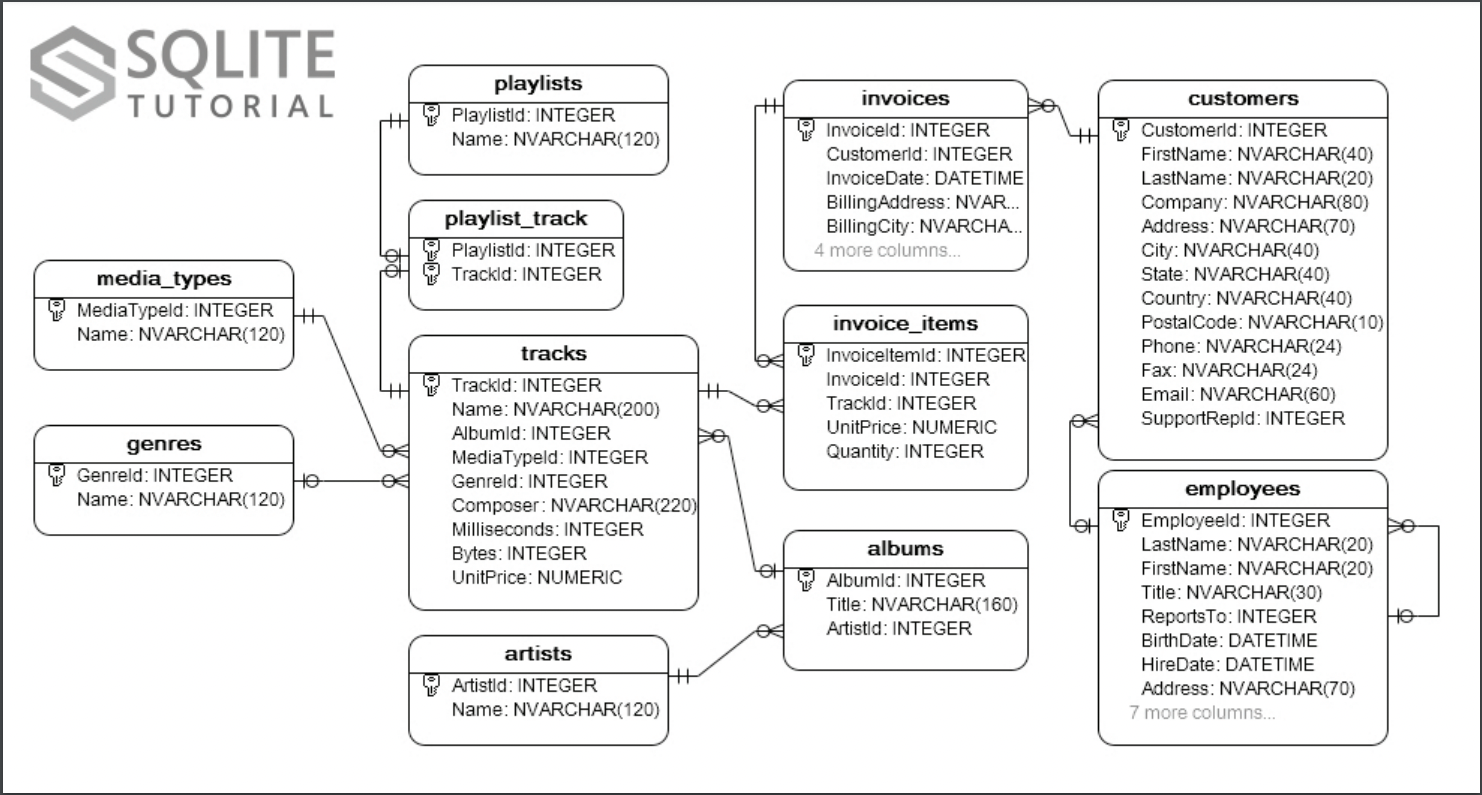

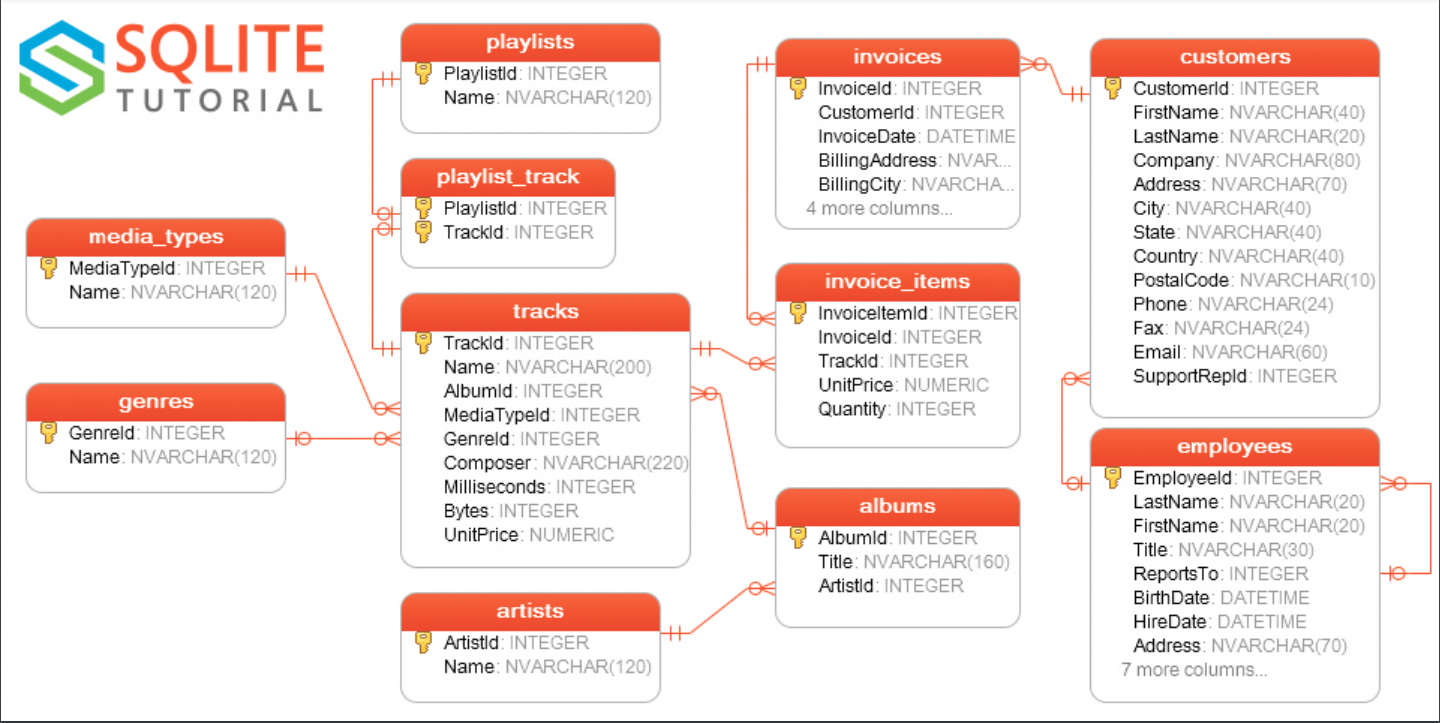

In [ ]:
chinook = sqlite3.Connection("chinook.db")

In [ ]:
cursor = chinook.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
display(cursor.fetchall())

[('albums',),
 ('sqlite_sequence',),
 ('artists',),
 ('customers',),
 ('employees',),
 ('genres',),
 ('invoices',),
 ('invoice_items',),
 ('media_types',),
 ('playlists',),
 ('playlist_track',),
 ('tracks',),
 ('sqlite_stat1',)]

In [ ]:
read_sql_query("""
  SELECT *
  FROM albums
""", chinook).head()

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
